# Simple Linear Regression
### Fuel Consumption Example

**About The Sheet**
We will learn to use scikit learn to implement simple linear regression. We download a dataset that is related to fuel consumption and Carbon Dioxide emission of cars. Then we split our data into trainig and test sets, create a model using training set, evalauate this model using test set and finally use model to predict unknown value.

## Importing Packages and Platform Establishment

In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as mp # plotting graphs
import pylab as pl # bulk import of mp ad np
%matplotlib inline #to print everything in line

/kaggle/input/fuelconsumption/FuelConsumption_file.csv


UsageError: unrecognized arguments: #to print everything in line


## Added file using Data option
 Then read it directly and store it in a variable

In [ ]:
datafile = pd.read_csv("../input/fuelconsumption/FuelConsumption_file.csv")
# storing dataset in file
datafile.head(3)
# listing first three rows

## What is this about?
**FuelConsumption.csv**
We have downloaded a fuel consumption dataset, 'FuelConsumpton.csv', which contains model specific fuel consumption ratings and estimated carbon dioxide emissions for new light duty vehicles for retail sale in Canada.
* MODELYEAR eg 2014
* MAKE eg Acure
* MODEL eg ILX
* VEHICLE CLASS eg SUV
* ENGINE SIZE eg 4.7
* CYLINDERS eg 6
* TRANSMISSION eg A6
* FUELCONSUMPTION IN CITY (L/100KM) eg 9.9
* FUELCONSUMPTION IN HWY (L/100KM) eg 8.9
* FUEL CONSUMPTION COMB (L/100KM) eg 9.2
* CO2 EMISSION(g.km) eg 182 -> low ->0

In [ ]:
datafile.describe()
#overview of data

In [59]:
cdf=datafile[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
# storing the only needed data set in a fresh avariable and listing its last 4 values
cdf.tail(4)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260
1066,3.2,6,12.8,294


### Plotting these value against CO2 Emission

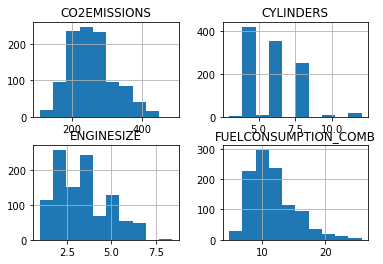

In [60]:
viz= cdf[['ENGINESIZE','CYLINDERS','CO2EMISSIONS', 'FUELCONSUMPTION_COMB']] # keeping elements aside
# storing in a fresh variable
viz.hist() # make a histogram
mp.show() # print it in line using matplot library

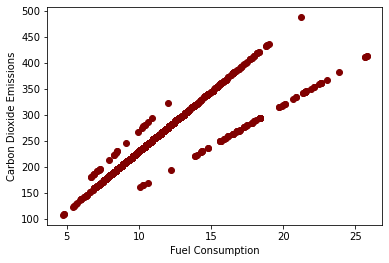

In [61]:
mp.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'maroon')
mp.xlabel("Fuel Consumption")
mp.ylabel("Carbon Dioxide Emissions")
mp.show()

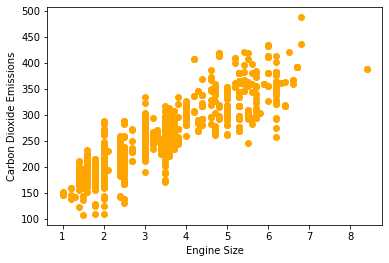

In [62]:
mp.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'orange')
mp.xlabel("Engine Size")
mp.ylabel("Carbon Dioxide Emissions")
mp.show()

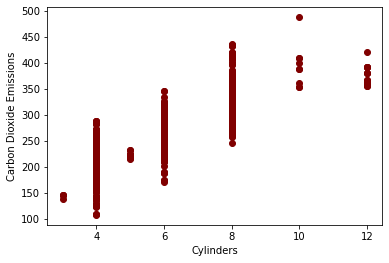

In [63]:
mp.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'maroon')
mp.xlabel("Cylinders")
mp.ylabel("Carbon Dioxide Emissions")
mp.show()

### Creating Train and Test Dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively which are mutually exclusive. After which, you train witht the training set and test with the testing set. This will provide a more accurate evaluation on out of sample accuracy because the testng dataset is not part of dataset that has been used to train the data. It is more relalistic for real world problem.

This means that we know the outcome of each data point in theis dataset, making it great to test with! And this data has not been used to train the model, the model has no knowledge of the coutcome of these data pounts. So, In essence, it is truly an out oof sample testing.

Let split out into trainig and test sets, 80% of the entire data for trainig, and the 20% for testing. We create a msak to select reandom rows using np.random.rand() function

In [64]:
mask= np.random.rand(len(datafile)) < 0.7
# Selecting 70% of data for training
train = cdf[mask] # 70 % data gets here
test=cdf[~mask] # Everything except data laready in mask
train.tail(4) # listing 4 values form this data set
#test.tail(4)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1065,3.2,6,11.3,260
1066,3.2,6,12.8,294


## Simple Regression Model

Linear Regression fits a linear model with coefficients Theta = (Theta_1, ...Theta_n) to minimize the 'Residuual sum of squares' between he independent x int he dataset and the dependetn y by te linear approximation

### Train Data Distribution

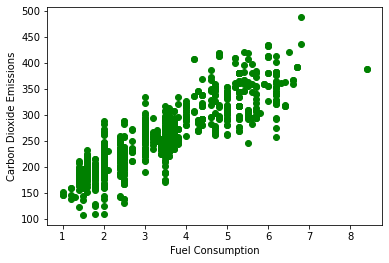

In [65]:
mp.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'GREEN')
# scater plot for the above two parameter
mp.xlabel("Fuel Consumption")
mp.ylabel("Carbon Dioxide Emissions")
mp.show()

### Modeling the data

Using sklean package to model

In [66]:
from sklearn import linear_model
# bringing the camel down
regr = linear_model.LinearRegression()
# storing regretion algo in a variable or simply generating an instance
train_x = np.asanyarray(train[['ENGINESIZE']])
# obtain train data base
train_y = np.asanyarray(train[['CO2EMISSIONS']])
# obtain train data to be predicted
regr.fit(train_x, train_y)
# regression for Emmision with respect ot Engine Size

#the coffecients
print ('Coefficients: ',regr.coef_) # the theta or slope
print ('Intercepts: ', regr.intercept_) # the intercept or y when x is 0

Coefficients:  [[39.5890485]]
Intercepts:  [125.34784306]


As mentioned before, **Coefficients** and **Intercerpt** in the simple linear regression are the paramenters of the fit line. Given that it is a simple linear regression with only 2 parametes, knowing that the prameters are the intercept and slope of the line sklearn can estimate them  from our data. Notice that all of thedata must be available to traverse and calculate the parameters.

## Plot Outputs
We can plot the fit over the data

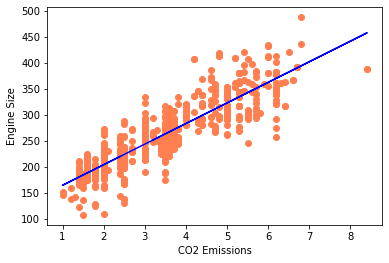

In [67]:
mp.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='coral')
mp.xlabel('CO2 Emissions')
mp.ylabel('Engine Size')
mp.plot(train_x, regr.coef_[0][0]*train_x+regr.intercept_[0],'-b')
# plot with these parameters

## Evaluation
We compared the actual values and predicted to calculate the accuracy of a aregression model. Evaluation metrics provide a key role in the development of a model, as it provides insights to areas that require improvement.

There are different model evaluation metrcs, ets use MSE here to calculate the accrucay of our model based on the test set.
* **Mean Absolute Error (MAE)**. It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since its just aerage error.
* **Mean Squared Error (MSE)**, is the mean of the quared errros. This is the most poplar of the Mean Error beacuse the focus is geared more towards large erros. This is due to the squared terms exponentioally increasing large errors in comparison to smaller ones.
* **Root Mean Squared Error (RMSE)**, This is the squared root of the Mean Square Error.
* **R-squared** is not error but is a popular metric for accuracy of your model. It represents *how close the data are to the fittted regression line*. The *higher the R-squared the better the model fit* your data. Best possible score is 1.0 adn it can be negative. (Because the model can be arbitrarily worse)

In [68]:
from sklearn.metrics import r2_score

test_x =np.asanyarray(test[['ENGINESIZE']])
test_y =np.asanyarray(test[['CO2EMISSIONS']])
test_y_pred = regr.predict(test_x)
# get predicted vales from the regression instance(made with training data set) with test data values
mae = np.mean(np.absolute(test_y_pred-test_y))
mse = np.mean((test_y_pred -test_y)**2)
r2= r2_score(test_y_pred, test_y)
# the three different paraments
print ("Mean absolute error: %.2f" %mae)
print ("Residual Sum of squares (MSE) %.2f" %mse)
print ("R@-score: %.2f" %r2)

Mean absolute error: 23.72
Residual Sum of squares (MSE) 931.37
R@-score: 0.68


*Inspiration : Saeed Aghabozorgi, CognitiveClass.ai*